## Fine Tuning

In this notebook, we will fine-tune the model created in the previous notebook. This process involves unfreezing a few of the top layers of the convolutional base used for feature creation and then training the whole model along with the dense classifier on top.

In [1]:
from keras.models import load_model


model = load_model('cats_and_dogs_small_4.h5') 

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [3]:
conv_base = model.get_layer('vgg16')
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
conv_base.trainiable = True

for layer in conv_base.layers:
    if layer.name in ['block5_conv1', 'block5_conv2', 'block5_conv2']:
        layer.trainable = True

## Import, Directory Paths

In [5]:
import os
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers


base_dir = './'

train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')                           

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')          

## Image Data Generators

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Model Compliation and Training

In [7]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-5), 
              metrics=['acc'])


history = model.fit(
    train_generator, 
    steps_per_epoch=100, 
    epochs=100, 
    validation_data=validation_generator, 
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 493s 5s/step - loss: 0.3000 - acc: 0.8635 - val_loss: 0.2156 - val_acc: 0.9170
Epoch 2/100
100/100 [==============================] - 493s 5s/step - loss: 0.2859 - acc: 0.8750 - val_loss: 0.2112 - val_acc: 0.9150
Epoch 3/100
100/100 [==============================] - 486s 5s/step - loss: 0.2694 - acc: 0.8865 - val_loss: 0.2149 - val_acc: 0.9210
Epoch 4/100
100/100 [==============================] - 493s 5s/step - loss: 0.2354 - acc: 0.9040 - val_loss: 0.1898 - val_acc: 0.9310
Epoch 5/100
100/100 [==============================] - 492s 5s/step - loss: 0.2385 - acc: 0.8985 - val_loss: 0.2120 - val_acc: 0.9270
Epoch 6/100
100/100 [==============================] - 489s 5s/step - loss: 0.2193 - acc: 0.9020 - val_loss: 0.1895 - val_acc: 0.9290
Epoch 7/100
100/100 [==============================] - 488s 5s/step - loss: 0.1945 - acc: 0.9145 - val_loss: 0.1943 - val_acc: 0.9260
Epoch 8/100
100/100 [==============================] - 493s 5s

Epoch 62/100
100/100 [==============================] - 503s 5s/step - loss: 0.0439 - acc: 0.9845 - val_loss: 0.2595 - val_acc: 0.9230
Epoch 63/100
100/100 [==============================] - 498s 5s/step - loss: 0.0446 - acc: 0.9825 - val_loss: 0.1711 - val_acc: 0.9490
Epoch 64/100
100/100 [==============================] - 495s 5s/step - loss: 0.0454 - acc: 0.9830 - val_loss: 0.2863 - val_acc: 0.9240
Epoch 65/100
100/100 [==============================] - 504s 5s/step - loss: 0.0430 - acc: 0.9805 - val_loss: 0.2534 - val_acc: 0.9340
Epoch 66/100
100/100 [==============================] - 499s 5s/step - loss: 0.0454 - acc: 0.9835 - val_loss: 0.2397 - val_acc: 0.9340
Epoch 67/100
100/100 [==============================] - 498s 5s/step - loss: 0.0476 - acc: 0.9805 - val_loss: 0.1968 - val_acc: 0.9460
Epoch 68/100
100/100 [==============================] - 499s 5s/step - loss: 0.0386 - acc: 0.9860 - val_loss: 0.4172 - val_acc: 0.9040
Epoch 69/100
100/100 [==============================] -

## Training and Validation Accuracy

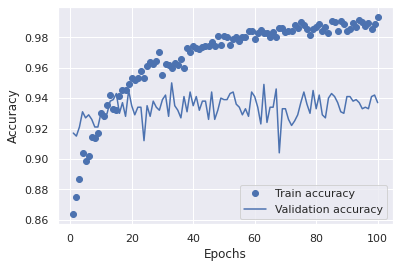

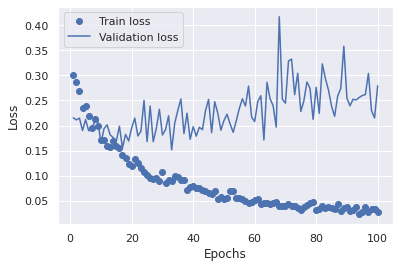

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


epochs = range(1, len(history.history['loss']) + 1)
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Train accuracy')
plt.plot(epochs, val_acc, '-', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, '-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [9]:
model.save('cats_and_dogs_small_5.h5')

## Test Accuracy

In [11]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 155s 3s/step - loss: 0.3406 - acc: 0.9370
test acc: 0.9369999766349792
